In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
batt_data = pd.read_csv('DATALOG.txt')
batt_data.columns = ['time', 'volts', 'state']
batt_data.head()

,time,volts,state
0,300673,1,0
1,600687,1,0
2,900700,1,0
3,1200714,1,0
4,1500727,1,0


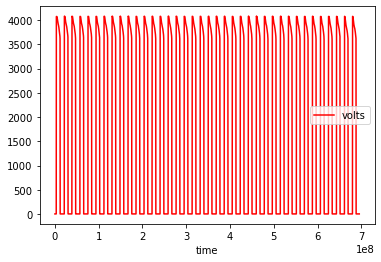

In [5]:
batt_data.plot(kind='line', x='time', y='volts', color='red')
plt.show()

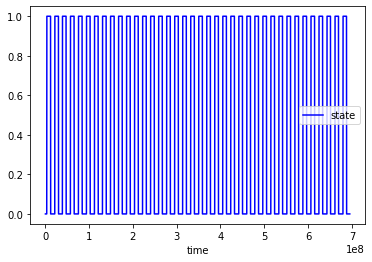

In [6]:
#state = 0 discharging
#state = 1 charging
batt_data.plot(kind='line', x='time', y='state', color='blue')
plt.show()

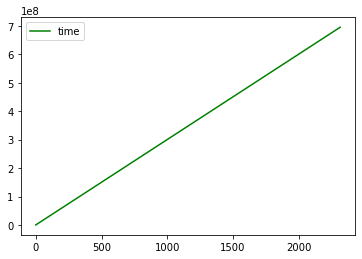

In [7]:
batt_data.plot(kind='line', y='time', use_index=True, color='green')
plt.show()

In [8]:
start_test_time = batt_data.loc[0, 'time']
end_test_time = batt_data.loc[len(batt_data)-1, 'time']
test_duration = end_test_time - start_test_time
test_duration = ((test_duration / 1000) / 3600)
print("Duration of the test (hrs):")
print(test_duration)

Duration of the test (hrs):
193.013365


In [12]:
discharge_times = []

for i in range(len(batt_data)):
    if batt_data.loc[i,'state'] == 0:
        start_time = (batt_data.loc[i, 'time'])
    
    try:
        if batt_data.loc[i+1, 'state'] == 1:
            end_time = (batt_data.loc[i, 'time'])
    except:
        print('end of test')

    discharge_time = ((end_time - start_time) / 1000) / 3600
    discharge_times.append(discharge_time)

print("Time to discharge: (hrs)")
print(discharge_times)

end of test
Time to discharge: (hrs)
[190.846535, 190.76319777777778, 190.67986083333332, 190.5965236111111, 190.51318666666666, 190.42984944444444, 190.34651222222223, 190.26317527777778, 190.17983805555556, 190.09650083333335, 0.0, 0.08339277777777777, 0.1667297222222222, 0.25006694444444444, 0.3334041666666667, 0.4167411111111111, 0.5000783333333333, 0.5834152777777778, 0.6667525000000001, 0.7500897222222221, 0.8334266666666666, 0.9167638888888888, 1.0001008333333332, 1.0834380555555556, 1.1667750000000001, 1.2501122222222223, 1.3334491666666668, 1.4167863888888887, 1.500123611111111, 1.5834605555555554, 1.6667977777777776, 1.750134722222222, 1.8334719444444443, 1.9168091666666667, 2.000148333333333, 2.0834852777777777, 2.1668225, 2.2501594444444444, 2.3334966666666666, 2.3334966666666666, -0.16673, -0.25006694444444444, -0.3334041666666667, -0.4167413888888889, -0.5000783333333333, -0.5834155555555555, -0.6667527777777777, -0.7500897222222221, -0.8334269444444444, -0.91676416666666

In [11]:
capacity = avg_current * discharge_time
print("Calculated capacity: (mAh)")
print(capacity)

Calculated capacity: (mAh)
651.8377904110287
